In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

#data_frame = read_csv_834()

data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

In [5]:
data_frame.columns

Index(['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.3', '1.0.4'],
      dtype='object')

In [6]:
data_frame = data_frame[['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.4']]

In [7]:
data_set = create_data_set(data_frame)

In [8]:
for i in data_set:
    print(i)

[26.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
[54.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.]
[51.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
[28.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[55.  2.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.]
[45.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
[45.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.]
[55.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[65.  2.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.]
[54.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.]
[70.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
[35.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[45.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[57.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.]
[55.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[40.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[48.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[48.  2.  0.  

[62.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[60.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.]
[43.  2.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
[45.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[64.  2.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
[58.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[60.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.]
[63.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.]
[45.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[55.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[64.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.]
[45.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[40.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
[42.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
[55.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
[55.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[52.  1.  1.  

[29.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[75.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
[36.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[60.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[29.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[30.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.]
[35.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
[43.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
[40.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.]
[57.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[63.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[55.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[50.  2.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
[42.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
[45.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[28.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[55.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[55.  1.  1.  

[60.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.]
[51.  2.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.]
[32.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.]
[48.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[47.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
[53.  2.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.]
[60.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[55.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[56.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[38.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
[52.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
[50.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.]
[60.  1.  2.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[50.  1.  2.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.]
[50.  2.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.]
[58.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.]
[41.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.]
[45.  1.  0.  

In [9]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [10]:
len(data_set[0])

14

In [11]:
len(actual_x[0])

13

In [12]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6534 - acc: 0.5987 - val_loss: 0.6535 - val_acc: 0.6310
Epoch 2/200
 - 0s - loss: 0.6448 - acc: 0.6000 - val_loss: 0.6585 - val_acc: 0.6310
Epoch 3/200
 - 0s - loss: 0.6342 - acc: 0.6333 - val_loss: 0.6639 - val_acc: 0.6310
Epoch 4/200
 - 0s - loss: 0.6271 - acc: 0.6440 - val_loss: 0.6497 - val_acc: 0.6667
Epoch 5/200
 - 0s - loss: 0.6170 - acc: 0.6827 - val_loss: 0.6328 - val_acc: 0.7024
Epoch 6/200
 - 0s - loss: 0.6074 - acc: 0.6987 - val_loss: 0.6246 - val_acc: 0.6905
Epoch 7/200
 - 0s - loss: 0.5997 - acc: 0.6867 - val_loss: 0.6784 - val_acc: 0.6786
Epoch 8/200
 - 0s - loss: 0.5972 - acc: 0.6880 - val_loss: 0.6254 - val_acc: 0.6548
Epoch 9/200
 - 0s - loss: 0.5988 - acc: 0.6960 - val_loss: 0.6277 - val_acc: 0.6667
Epoch 10/200
 - 0s - loss: 0.5936 - acc: 0.6987 - val_loss: 0.6250 - val_acc: 0.6667
Epoch 11/200
 - 0s - loss: 0.5837 - acc: 0.7200 - val_loss: 0.6273 - val_acc: 0.6667
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.5633 - acc: 0.7147 - val_loss: 0.6419 - val_acc: 0.6786
Epoch 98/200
 - 0s - loss: 0.5630 - acc: 0.7133 - val_loss: 0.6428 - val_acc: 0.7024
Epoch 99/200
 - 0s - loss: 0.5609 - acc: 0.7280 - val_loss: 0.6635 - val_acc: 0.6667
Epoch 100/200
 - 0s - loss: 0.5680 - acc: 0.7173 - val_loss: 0.6334 - val_acc: 0.6548
Epoch 101/200
 - 0s - loss: 0.5625 - acc: 0.7187 - val_loss: 0.6562 - val_acc: 0.6786
Epoch 102/200
 - 0s - loss: 0.5640 - acc: 0.7173 - val_loss: 0.6332 - val_acc: 0.6786
Epoch 103/200
 - 0s - loss: 0.5676 - acc: 0.7120 - val_loss: 0.6277 - val_acc: 0.6786
Epoch 104/200
 - 0s - loss: 0.5627 - acc: 0.7187 - val_loss: 0.6326 - val_acc: 0.6548
Epoch 105/200
 - 0s - loss: 0.5637 - acc: 0.7213 - val_loss: 0.6307 - val_acc: 0.6905
Epoch 106/200
 - 0s - loss: 0.5601 - acc: 0.7253 - val_loss: 0.6558 - val_acc: 0.6667
Epoch 107/200
 - 0s - loss: 0.5575 - acc: 0.7187 - val_loss: 0.6255 - val_acc: 0.7262
Epoch 108/200
 - 0s - loss: 0.5631 - acc: 0.7200 - val_lo

Epoch 193/200
 - 0s - loss: 0.5559 - acc: 0.7293 - val_loss: 0.6473 - val_acc: 0.6667
Epoch 194/200
 - 0s - loss: 0.5509 - acc: 0.7213 - val_loss: 0.6486 - val_acc: 0.6786
Epoch 195/200
 - 0s - loss: 0.5526 - acc: 0.7187 - val_loss: 0.6385 - val_acc: 0.6667
Epoch 196/200
 - 0s - loss: 0.5520 - acc: 0.7307 - val_loss: 0.6441 - val_acc: 0.6667
Epoch 197/200
 - 0s - loss: 0.5533 - acc: 0.7280 - val_loss: 0.6399 - val_acc: 0.6667
Epoch 198/200
 - 0s - loss: 0.5521 - acc: 0.7347 - val_loss: 0.6272 - val_acc: 0.6905
Epoch 199/200
 - 0s - loss: 0.5511 - acc: 0.7280 - val_loss: 0.6358 - val_acc: 0.6786
Epoch 200/200
 - 0s - loss: 0.5524 - acc: 0.7293 - val_loss: 0.6232 - val_acc: 0.6905


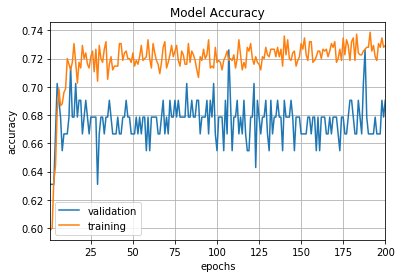

84/84 [==============================] - 0s 74us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.623175439380464, 0.6904761933145069]
 best Score: 0.6904761933145069          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6745 - acc: 0.5987 - val_loss: 0.6296 - val_acc: 0.7262
Epoch 2/200
 - 0s - loss: 0.6344 - acc: 0.6413 - val_loss: 0.5794 - val_acc: 0.7143
Epoch 3/200
 - 0s - loss: 0.6345 - acc: 0.6720 - val_loss: 0.6022 - val_acc: 0.7262
Epoch 4/200
 - 0s - loss: 0.6181 - acc: 0.6760 - val_loss: 0.5768 - val_acc: 0.7262
Epoch 5/200
 - 0s - loss: 0.6165 - acc: 0.6867 - val_loss: 0.5812 - val_acc: 0.7262
Epoch 6/200
 - 0s - loss: 0.6056 - acc: 0.6787 - val_loss: 0.6666 - val_acc: 0.5595
Epoch 7/200
 - 0s - loss: 0.5990 - acc: 0.6880 - val_loss: 0.6373 - val_acc: 0.6429
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.5683 - acc: 0.7293 - val_loss: 0.6325 - val_acc: 0.6548
Epoch 94/200
 - 0s - loss: 0.5742 - acc: 0.7267 - val_loss: 0.5910 - val_acc: 0.7262
Epoch 95/200
 - 0s - loss: 0.5731 - acc: 0.7107 - val_loss: 0.6049 - val_acc: 0.7024
Epoch 96/200
 - 0s - loss: 0.5669 - acc: 0.7333 - val_loss: 0.5847 - val_acc: 0.7143
Epoch 97/200
 - 0s - loss: 0.5650 - acc: 0.7213 - val_loss: 0.5893 - val_acc: 0.7143
Epoch 98/200
 - 0s - loss: 0.5710 - acc: 0.7067 - val_loss: 0.5969 - val_acc: 0.7024
Epoch 99/200
 - 0s - loss: 0.5714 - acc: 0.7227 - val_loss: 0.6595 - val_acc: 0.6310
Epoch 100/200
 - 0s - loss: 0.5678 - acc: 0.7147 - val_loss: 0.5938 - val_acc: 0.7143
Epoch 101/200
 - 0s - loss: 0.5682 - acc: 0.7253 - val_loss: 0.6166 - val_acc: 0.6786
Epoch 102/200
 - 0s - loss: 0.5702 - acc: 0.7160 - val_loss: 0.5886 - val_acc: 0.7143
Epoch 103/200
 - 0s - loss: 0.5693 - acc: 0.7147 - val_loss: 0.5831 - val_acc: 0.7143
Epoch 104/200
 - 0s - loss: 0.5671 - acc: 0.7147 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5581 - acc: 0.7173 - val_loss: 0.6037 - val_acc: 0.6905
Epoch 190/200
 - 0s - loss: 0.5606 - acc: 0.7173 - val_loss: 0.6028 - val_acc: 0.7024
Epoch 191/200
 - 0s - loss: 0.5566 - acc: 0.7240 - val_loss: 0.6794 - val_acc: 0.6310
Epoch 192/200
 - 0s - loss: 0.5567 - acc: 0.7213 - val_loss: 0.6164 - val_acc: 0.6667
Epoch 193/200
 - 0s - loss: 0.5644 - acc: 0.7133 - val_loss: 0.6109 - val_acc: 0.6786
Epoch 194/200
 - 0s - loss: 0.5595 - acc: 0.7280 - val_loss: 0.6024 - val_acc: 0.7024
Epoch 195/200
 - 0s - loss: 0.5614 - acc: 0.7173 - val_loss: 0.6151 - val_acc: 0.6548
Epoch 196/200
 - 0s - loss: 0.5599 - acc: 0.7213 - val_loss: 0.6976 - val_acc: 0.5833
Epoch 197/200
 - 0s - loss: 0.5641 - acc: 0.7253 - val_loss: 0.6003 - val_acc: 0.6905
Epoch 198/200
 - 0s - loss: 0.5617 - acc: 0.7240 - val_loss: 0.6495 - val_acc: 0.6667
Epoch 199/200
 - 0s - loss: 0.5554 - acc: 0.7173 - val_loss: 0.6290 - val_acc: 0.6548
Epoch 200/200
 - 0s - loss: 0.5592 - acc: 0.7240 - val

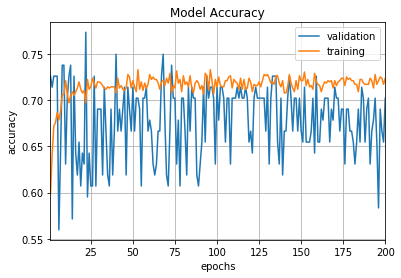

84/84 [==============================] - 0s 122us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5980845803306216, 0.7023809467043195]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 1.0307 - acc: 0.4733 - val_loss: 0.7317 - val_acc: 0.4881
Epoch 2/200
 - 0s - loss: 0.6644 - acc: 0.6147 - val_loss: 0.7181 - val_acc: 0.4881
Epoch 3/200
 - 0s - loss: 0.6608 - acc: 0.6147 - val_loss: 0.7443 - val_acc: 0.4881
Epoch 4/200
 - 0s - loss: 0.6591 - acc: 0.6147 - val_loss: 0.7210 - val_acc: 0.4881
Epoch 5/200
 - 0s - loss: 0.6605 - acc: 0.6147 - val_loss: 0.7385 - val_acc: 0.4881
Epoch 6/200
 - 0s - loss: 0.6595 - acc: 0.6160 - val_loss: 0.7226 - val_acc: 0.4881
Epoch 7/200
 - 0s - loss: 0.6522 - acc: 0.6173 - val_loss: 0.6811 - val_acc: 0.5595
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5679 - acc: 0.7293 - val_loss: 0.6638 - val_acc: 0.6429
Epoch 94/200
 - 0s - loss: 0.5661 - acc: 0.7347 - val_loss: 0.6586 - val_acc: 0.6429
Epoch 95/200
 - 0s - loss: 0.5668 - acc: 0.7173 - val_loss: 0.6354 - val_acc: 0.6667
Epoch 96/200
 - 0s - loss: 0.5665 - acc: 0.7333 - val_loss: 0.6774 - val_acc: 0.5952
Epoch 97/200
 - 0s - loss: 0.5730 - acc: 0.7187 - val_loss: 0.6880 - val_acc: 0.6071
Epoch 98/200
 - 0s - loss: 0.5681 - acc: 0.7320 - val_loss: 0.6332 - val_acc: 0.7024
Epoch 99/200
 - 0s - loss: 0.5707 - acc: 0.7240 - val_loss: 0.6439 - val_acc: 0.6905
Epoch 100/200
 - 0s - loss: 0.5639 - acc: 0.7307 - val_loss: 0.6645 - val_acc: 0.6310
Epoch 101/200
 - 0s - loss: 0.5649 - acc: 0.7120 - val_loss: 0.6605 - val_acc: 0.6548
Epoch 102/200
 - 0s - loss: 0.5696 - acc: 0.7320 - val_loss: 0.6510 - val_acc: 0.6667
Epoch 103/200
 - 0s - loss: 0.5653 - acc: 0.7213 - val_loss: 0.7131 - val_acc: 0.6071
Epoch 104/200
 - 0s - loss: 0.5671 - acc: 0.7293 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5626 - acc: 0.7320 - val_loss: 0.6439 - val_acc: 0.6905
Epoch 190/200
 - 0s - loss: 0.5626 - acc: 0.7280 - val_loss: 0.6740 - val_acc: 0.6310
Epoch 191/200
 - 0s - loss: 0.5644 - acc: 0.7293 - val_loss: 0.6470 - val_acc: 0.6786
Epoch 192/200
 - 0s - loss: 0.5644 - acc: 0.7373 - val_loss: 0.6710 - val_acc: 0.6667
Epoch 193/200
 - 0s - loss: 0.5647 - acc: 0.7253 - val_loss: 0.6466 - val_acc: 0.6548
Epoch 194/200
 - 0s - loss: 0.5631 - acc: 0.7280 - val_loss: 0.6416 - val_acc: 0.6786
Epoch 195/200
 - 0s - loss: 0.5636 - acc: 0.7280 - val_loss: 0.6901 - val_acc: 0.5952
Epoch 196/200
 - 0s - loss: 0.5636 - acc: 0.7360 - val_loss: 0.6593 - val_acc: 0.6548
Epoch 197/200
 - 0s - loss: 0.5632 - acc: 0.7333 - val_loss: 0.6665 - val_acc: 0.6667
Epoch 198/200
 - 0s - loss: 0.5633 - acc: 0.7293 - val_loss: 0.6642 - val_acc: 0.6548
Epoch 199/200
 - 0s - loss: 0.5615 - acc: 0.7320 - val_loss: 0.6826 - val_acc: 0.6310
Epoch 200/200
 - 0s - loss: 0.5618 - acc: 0.7333 - val

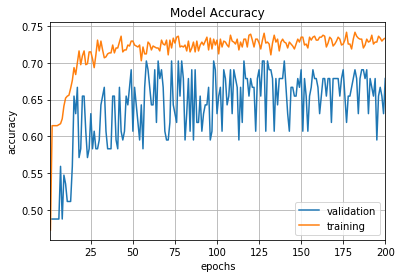

84/84 [==============================] - 0s 161us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.645675608089992, 0.6785714285714286]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 2.1250 - acc: 0.6013 - val_loss: 0.6894 - val_acc: 0.5595
Epoch 2/200
 - 0s - loss: 0.6726 - acc: 0.5787 - val_loss: 0.6920 - val_acc: 0.5595
Epoch 3/200
 - 0s - loss: 0.6721 - acc: 0.5800 - val_loss: 0.6818 - val_acc: 0.5595
Epoch 4/200
 - 0s - loss: 0.6618 - acc: 0.6027 - val_loss: 0.6745 - val_acc: 0.5714
Epoch 5/200
 - 0s - loss: 0.6669 - acc: 0.5960 - val_loss: 0.6930 - val_acc: 0.5595
Epoch 6/200
 - 0s - loss: 0.6604 - acc: 0.6080 - val_loss: 0.6783 - val_acc: 0.5595
Epoch 7/200
 - 0s - loss: 0.6570 - acc: 0.6080 - val_loss: 0.6675 - val_acc: 0.5833
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5728 - acc: 0.7293 - val_loss: 0.6274 - val_acc: 0.6310
Epoch 94/200
 - 0s - loss: 0.5739 - acc: 0.7227 - val_loss: 0.6224 - val_acc: 0.6548
Epoch 95/200
 - 0s - loss: 0.5742 - acc: 0.7267 - val_loss: 0.6233 - val_acc: 0.6548
Epoch 96/200
 - 0s - loss: 0.5746 - acc: 0.7173 - val_loss: 0.6248 - val_acc: 0.6429
Epoch 97/200
 - 0s - loss: 0.5713 - acc: 0.7200 - val_loss: 0.6649 - val_acc: 0.6667
Epoch 98/200
 - 0s - loss: 0.5753 - acc: 0.7133 - val_loss: 0.6338 - val_acc: 0.6310
Epoch 99/200
 - 0s - loss: 0.5720 - acc: 0.7240 - val_loss: 0.6351 - val_acc: 0.6429
Epoch 100/200
 - 0s - loss: 0.5751 - acc: 0.7213 - val_loss: 0.6274 - val_acc: 0.6429
Epoch 101/200
 - 0s - loss: 0.5724 - acc: 0.7267 - val_loss: 0.6444 - val_acc: 0.6667
Epoch 102/200
 - 0s - loss: 0.5732 - acc: 0.7133 - val_loss: 0.6326 - val_acc: 0.6190
Epoch 103/200
 - 0s - loss: 0.5726 - acc: 0.7213 - val_loss: 0.6318 - val_acc: 0.6310
Epoch 104/200
 - 0s - loss: 0.5713 - acc: 0.7200 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5662 - acc: 0.7320 - val_loss: 0.6267 - val_acc: 0.6429
Epoch 190/200
 - 0s - loss: 0.5647 - acc: 0.7360 - val_loss: 0.6226 - val_acc: 0.6548
Epoch 191/200
 - 0s - loss: 0.5678 - acc: 0.7307 - val_loss: 0.6205 - val_acc: 0.6786
Epoch 192/200
 - 0s - loss: 0.5688 - acc: 0.7307 - val_loss: 0.6217 - val_acc: 0.6548
Epoch 193/200
 - 0s - loss: 0.5676 - acc: 0.7253 - val_loss: 0.6263 - val_acc: 0.6429
Epoch 194/200
 - 0s - loss: 0.5658 - acc: 0.7267 - val_loss: 0.6267 - val_acc: 0.6786
Epoch 195/200
 - 0s - loss: 0.5657 - acc: 0.7347 - val_loss: 0.6276 - val_acc: 0.6310
Epoch 196/200
 - 0s - loss: 0.5601 - acc: 0.7373 - val_loss: 0.6457 - val_acc: 0.6667
Epoch 197/200
 - 0s - loss: 0.5662 - acc: 0.7267 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 198/200
 - 0s - loss: 0.5678 - acc: 0.7253 - val_loss: 0.6202 - val_acc: 0.6429
Epoch 199/200
 - 0s - loss: 0.5671 - acc: 0.7413 - val_loss: 0.6334 - val_acc: 0.6905
Epoch 200/200
 - 0s - loss: 0.5659 - acc: 0.7320 - val

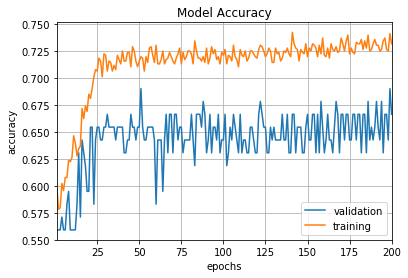

84/84 [==============================] - 0s 56us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.62464059534527, 0.6666666666666666]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7959 - acc: 0.5340 - val_loss: 0.7326 - val_acc: 0.5542
Epoch 2/200
 - 0s - loss: 0.6782 - acc: 0.5965 - val_loss: 0.6798 - val_acc: 0.5542
Epoch 3/200
 - 0s - loss: 0.6616 - acc: 0.6112 - val_loss: 0.6727 - val_acc: 0.5422
Epoch 4/200
 - 0s - loss: 0.6603 - acc: 0.6059 - val_loss: 0.6960 - val_acc: 0.5542
Epoch 5/200
 - 0s - loss: 0.6617 - acc: 0.6059 - val_loss: 0.6689 - val_acc: 0.5542
Epoch 6/200
 - 0s - loss: 0.6616 - acc: 0.6072 - val_loss: 0.6659 - val_acc: 0.5663
Epoch 7/200
 - 0s - loss: 0.6562 - acc: 0.6178 - val_loss: 0.6823 - val_acc: 0.5542
Epoch 8/200


Epoch 93/200
 - 0s - loss: 0.5794 - acc: 0.7150 - val_loss: 0.5632 - val_acc: 0.7108
Epoch 94/200
 - 0s - loss: 0.5783 - acc: 0.7137 - val_loss: 0.5757 - val_acc: 0.6988
Epoch 95/200
 - 0s - loss: 0.5750 - acc: 0.7124 - val_loss: 0.5780 - val_acc: 0.6867
Epoch 96/200
 - 0s - loss: 0.5735 - acc: 0.7164 - val_loss: 0.5661 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5776 - acc: 0.7204 - val_loss: 0.5601 - val_acc: 0.7229
Epoch 98/200
 - 0s - loss: 0.5753 - acc: 0.7084 - val_loss: 0.5746 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5784 - acc: 0.7204 - val_loss: 0.6507 - val_acc: 0.6265
Epoch 100/200
 - 0s - loss: 0.5784 - acc: 0.7097 - val_loss: 0.5610 - val_acc: 0.7229
Epoch 101/200
 - 0s - loss: 0.5759 - acc: 0.7244 - val_loss: 0.5651 - val_acc: 0.7108
Epoch 102/200
 - 0s - loss: 0.5761 - acc: 0.7297 - val_loss: 0.5841 - val_acc: 0.6867
Epoch 103/200
 - 0s - loss: 0.5810 - acc: 0.7111 - val_loss: 0.5790 - val_acc: 0.6867
Epoch 104/200
 - 0s - loss: 0.5736 - acc: 0.7244 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5650 - acc: 0.7217 - val_loss: 0.5661 - val_acc: 0.7711
Epoch 190/200
 - 0s - loss: 0.5672 - acc: 0.7111 - val_loss: 0.5882 - val_acc: 0.6988
Epoch 191/200
 - 0s - loss: 0.5674 - acc: 0.7164 - val_loss: 0.5687 - val_acc: 0.7229
Epoch 192/200
 - 0s - loss: 0.5594 - acc: 0.7150 - val_loss: 0.5634 - val_acc: 0.6988
Epoch 193/200
 - 0s - loss: 0.5667 - acc: 0.7177 - val_loss: 0.5644 - val_acc: 0.7229
Epoch 194/200
 - 0s - loss: 0.5653 - acc: 0.7204 - val_loss: 0.5774 - val_acc: 0.7590
Epoch 195/200
 - 0s - loss: 0.5671 - acc: 0.7057 - val_loss: 0.5638 - val_acc: 0.6988
Epoch 196/200
 - 0s - loss: 0.5654 - acc: 0.7111 - val_loss: 0.5710 - val_acc: 0.7590
Epoch 197/200
 - 0s - loss: 0.5669 - acc: 0.7097 - val_loss: 0.5811 - val_acc: 0.6867
Epoch 198/200
 - 0s - loss: 0.5630 - acc: 0.7111 - val_loss: 0.5752 - val_acc: 0.6988
Epoch 199/200
 - 0s - loss: 0.5609 - acc: 0.7177 - val_loss: 0.6310 - val_acc: 0.6265
Epoch 200/200
 - 0s - loss: 0.5677 - acc: 0.7257 - val

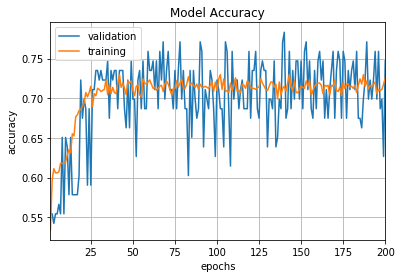

83/83 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5646314376808075, 0.7469879532434854]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 2.4378 - acc: 0.5779 - val_loss: 1.0035 - val_acc: 0.3494
Epoch 2/200
 - 0s - loss: 0.6815 - acc: 0.5646 - val_loss: 0.6456 - val_acc: 0.6506
Epoch 3/200
 - 0s - loss: 0.6741 - acc: 0.5885 - val_loss: 0.6957 - val_acc: 0.4578
Epoch 4/200
 - 0s - loss: 0.6669 - acc: 0.6019 - val_loss: 0.6055 - val_acc: 0.6627
Epoch 5/200
 - 0s - loss: 0.6622 - acc: 0.6019 - val_loss: 0.8177 - val_acc: 0.3494
Epoch 6/200
 - 0s - loss: 0.6588 - acc: 0.5939 - val_loss: 0.6056 - val_acc: 0.6627
Epoch 7/200
 - 0s - loss: 0.6469 - acc: 0.6378 - val_loss: 0.7847 - val_acc: 0.3494
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5766 - acc: 0.7177 - val_loss: 0.5749 - val_acc: 0.6867
Epoch 94/200
 - 0s - loss: 0.5791 - acc: 0.7111 - val_loss: 0.5943 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5713 - acc: 0.7177 - val_loss: 0.5761 - val_acc: 0.7349
Epoch 96/200
 - 0s - loss: 0.5732 - acc: 0.7244 - val_loss: 0.6426 - val_acc: 0.6867
Epoch 97/200
 - 0s - loss: 0.5767 - acc: 0.7164 - val_loss: 0.5783 - val_acc: 0.7470
Epoch 98/200
 - 0s - loss: 0.5739 - acc: 0.7230 - val_loss: 0.5752 - val_acc: 0.7470
Epoch 99/200
 - 0s - loss: 0.5743 - acc: 0.7217 - val_loss: 0.5751 - val_acc: 0.6988
Epoch 100/200
 - 0s - loss: 0.5690 - acc: 0.7244 - val_loss: 0.5743 - val_acc: 0.7349
Epoch 101/200
 - 0s - loss: 0.5720 - acc: 0.7097 - val_loss: 0.5755 - val_acc: 0.7108
Epoch 102/200
 - 0s - loss: 0.5713 - acc: 0.7177 - val_loss: 0.6377 - val_acc: 0.6867
Epoch 103/200
 - 0s - loss: 0.5740 - acc: 0.7390 - val_loss: 0.5759 - val_acc: 0.7349
Epoch 104/200
 - 0s - loss: 0.5721 - acc: 0.7204 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5632 - acc: 0.7324 - val_loss: 0.5705 - val_acc: 0.7470
Epoch 190/200
 - 0s - loss: 0.5692 - acc: 0.7230 - val_loss: 0.5711 - val_acc: 0.7108
Epoch 191/200
 - 0s - loss: 0.5660 - acc: 0.7284 - val_loss: 0.6554 - val_acc: 0.6747
Epoch 192/200
 - 0s - loss: 0.5696 - acc: 0.7244 - val_loss: 0.5897 - val_acc: 0.6747
Epoch 193/200
 - 0s - loss: 0.5644 - acc: 0.7244 - val_loss: 0.5734 - val_acc: 0.7470
Epoch 194/200
 - 0s - loss: 0.5615 - acc: 0.7297 - val_loss: 0.6044 - val_acc: 0.7349
Epoch 195/200
 - 0s - loss: 0.5670 - acc: 0.7204 - val_loss: 0.5704 - val_acc: 0.7349
Epoch 196/200
 - 0s - loss: 0.5657 - acc: 0.7310 - val_loss: 0.5755 - val_acc: 0.7349
Epoch 197/200
 - 0s - loss: 0.5661 - acc: 0.7204 - val_loss: 0.5971 - val_acc: 0.7349
Epoch 198/200
 - 0s - loss: 0.5706 - acc: 0.7217 - val_loss: 0.5875 - val_acc: 0.6747
Epoch 199/200
 - 0s - loss: 0.5644 - acc: 0.7244 - val_loss: 0.5691 - val_acc: 0.7349
Epoch 200/200
 - 0s - loss: 0.5631 - acc: 0.7217 - val

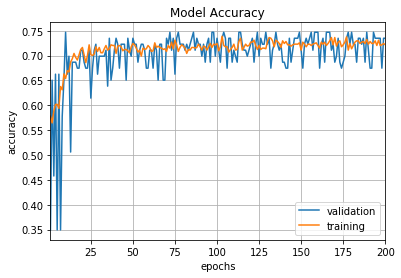

83/83 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5841152897800308, 0.7349397532911186]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7629 - acc: 0.5979 - val_loss: 0.5786 - val_acc: 0.6867
Epoch 2/200
 - 0s - loss: 0.6554 - acc: 0.6072 - val_loss: 0.5726 - val_acc: 0.6867
Epoch 3/200
 - 0s - loss: 0.6445 - acc: 0.6165 - val_loss: 0.6754 - val_acc: 0.5904
Epoch 4/200
 - 0s - loss: 0.6461 - acc: 0.6471 - val_loss: 0.6681 - val_acc: 0.5663
Epoch 5/200
 - 0s - loss: 0.6419 - acc: 0.6471 - val_loss: 0.5526 - val_acc: 0.6988
Epoch 6/200
 - 0s - loss: 0.6341 - acc: 0.6698 - val_loss: 0.5468 - val_acc: 0.7470
Epoch 7/200
 - 0s - loss: 0.6276 - acc: 0.6631 - val_loss: 0.5476 - val_acc: 0.7229
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5752 - acc: 0.7111 - val_loss: 0.5003 - val_acc: 0.7711
Epoch 94/200
 - 0s - loss: 0.5741 - acc: 0.7031 - val_loss: 0.5130 - val_acc: 0.7470
Epoch 95/200
 - 0s - loss: 0.5775 - acc: 0.7071 - val_loss: 0.5833 - val_acc: 0.7349
Epoch 96/200
 - 0s - loss: 0.5787 - acc: 0.7137 - val_loss: 0.5074 - val_acc: 0.7831
Epoch 97/200
 - 0s - loss: 0.5742 - acc: 0.7150 - val_loss: 0.5074 - val_acc: 0.7470
Epoch 98/200
 - 0s - loss: 0.5743 - acc: 0.7057 - val_loss: 0.5050 - val_acc: 0.7952
Epoch 99/200
 - 0s - loss: 0.5751 - acc: 0.7111 - val_loss: 0.5041 - val_acc: 0.7711
Epoch 100/200
 - 0s - loss: 0.5743 - acc: 0.7097 - val_loss: 0.6183 - val_acc: 0.6627
Epoch 101/200
 - 0s - loss: 0.5781 - acc: 0.7124 - val_loss: 0.5145 - val_acc: 0.7711
Epoch 102/200
 - 0s - loss: 0.5803 - acc: 0.7004 - val_loss: 0.5113 - val_acc: 0.7590
Epoch 103/200
 - 0s - loss: 0.5737 - acc: 0.7164 - val_loss: 0.6324 - val_acc: 0.6747
Epoch 104/200
 - 0s - loss: 0.5753 - acc: 0.7164 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5719 - acc: 0.7150 - val_loss: 0.5003 - val_acc: 0.7711
Epoch 190/200
 - 0s - loss: 0.5739 - acc: 0.6977 - val_loss: 0.5821 - val_acc: 0.7349
Epoch 191/200
 - 0s - loss: 0.5773 - acc: 0.6977 - val_loss: 0.5014 - val_acc: 0.7711
Epoch 192/200
 - 0s - loss: 0.5726 - acc: 0.7044 - val_loss: 0.4999 - val_acc: 0.7470
Epoch 193/200
 - 0s - loss: 0.5693 - acc: 0.7124 - val_loss: 0.5107 - val_acc: 0.7590
Epoch 194/200
 - 0s - loss: 0.5721 - acc: 0.7097 - val_loss: 0.4977 - val_acc: 0.7711
Epoch 195/200
 - 0s - loss: 0.5747 - acc: 0.7044 - val_loss: 0.5019 - val_acc: 0.7711
Epoch 196/200
 - 0s - loss: 0.5722 - acc: 0.7084 - val_loss: 0.5124 - val_acc: 0.7470
Epoch 197/200
 - 0s - loss: 0.5723 - acc: 0.7164 - val_loss: 0.5137 - val_acc: 0.7590
Epoch 198/200
 - 0s - loss: 0.5731 - acc: 0.7084 - val_loss: 0.5105 - val_acc: 0.7590
Epoch 199/200
 - 0s - loss: 0.5713 - acc: 0.7057 - val_loss: 0.5140 - val_acc: 0.7590
Epoch 200/200
 - 0s - loss: 0.5670 - acc: 0.7190 - val

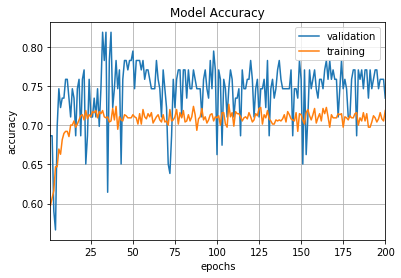

83/83 [==============================] - 0s 87us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.5101537991719074, 0.7349397532911186]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6905 - acc: 0.5646 - val_loss: 0.6860 - val_acc: 0.5783
Epoch 2/200
 - 0s - loss: 0.6805 - acc: 0.6045 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 3/200
 - 0s - loss: 0.6765 - acc: 0.6045 - val_loss: 0.6816 - val_acc: 0.5783
Epoch 4/200
 - 0s - loss: 0.6746 - acc: 0.6045 - val_loss: 0.6810 - val_acc: 0.5783
Epoch 5/200
 - 0s - loss: 0.6732 - acc: 0.6045 - val_loss: 0.6808 - val_acc: 0.5783
Epoch 6/200
 - 0s - loss: 0.6726 - acc: 0.6045 - val_loss: 0.6809 - val_acc: 0.5783
Epoch 7/200
 - 0s - loss: 0.6721 - acc: 0.6045 - val_loss: 0.6811 - val_acc: 0.5783
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 94/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 95/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 96/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 97/200
 - 0s - loss: 0.6714 - acc: 0.6045 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 98/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 99/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 100/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6822 - val_acc: 0.5783
Epoch 101/200
 - 0s - loss: 0.6712 - acc: 0.6045 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 102/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 103/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 104/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6822 - val_acc: 0.5783
Epoch 190/200
 - 0s - loss: 0.6712 - acc: 0.6045 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 191/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 192/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 193/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6821 - val_acc: 0.5783
Epoch 194/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6820 - val_acc: 0.5783
Epoch 195/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6821 - val_acc: 0.5783
Epoch 196/200
 - 0s - loss: 0.6712 - acc: 0.6045 - val_loss: 0.6823 - val_acc: 0.5783
Epoch 197/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6825 - val_acc: 0.5783
Epoch 198/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6826 - val_acc: 0.5783
Epoch 199/200
 - 0s - loss: 0.6713 - acc: 0.6045 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 200/200
 - 0s - loss: 0.6712 - acc: 0.6045 - val

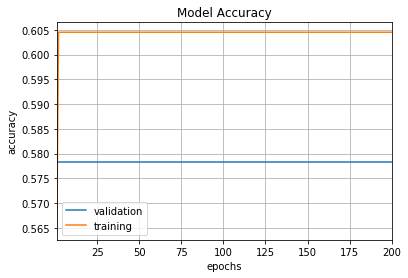

83/83 [==============================] - 0s 64us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.682443050734968, 0.5783132573208177]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 1.6892 - acc: 0.5992 - val_loss: 0.6403 - val_acc: 0.6145
Epoch 2/200
 - 0s - loss: 0.6489 - acc: 0.6178 - val_loss: 0.6401 - val_acc: 0.6145
Epoch 3/200
 - 0s - loss: 0.6466 - acc: 0.6325 - val_loss: 0.6887 - val_acc: 0.4940
Epoch 4/200
 - 0s - loss: 0.6446 - acc: 0.6218 - val_loss: 0.6259 - val_acc: 0.6988
Epoch 5/200
 - 0s - loss: 0.6343 - acc: 0.6525 - val_loss: 0.6473 - val_acc: 0.6747
Epoch 6/200
 - 0s - loss: 0.6307 - acc: 0.6551 - val_loss: 0.5842 - val_acc: 0.7711
Epoch 7/200
 - 0s - loss: 0.6207 - acc: 0.6658 - val_loss: 0.6146 - val_acc: 0.6627
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.5820 - acc: 0.7150 - val_loss: 0.5735 - val_acc: 0.7229
Epoch 94/200
 - 0s - loss: 0.5764 - acc: 0.7124 - val_loss: 0.6018 - val_acc: 0.7108
Epoch 95/200
 - 0s - loss: 0.5768 - acc: 0.7177 - val_loss: 0.5643 - val_acc: 0.7470
Epoch 96/200
 - 0s - loss: 0.5764 - acc: 0.7190 - val_loss: 0.5512 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5756 - acc: 0.7164 - val_loss: 0.6232 - val_acc: 0.7108
Epoch 98/200
 - 0s - loss: 0.5786 - acc: 0.7124 - val_loss: 0.5592 - val_acc: 0.7470
Epoch 99/200
 - 0s - loss: 0.5793 - acc: 0.7150 - val_loss: 0.5918 - val_acc: 0.7229
Epoch 100/200
 - 0s - loss: 0.5799 - acc: 0.7177 - val_loss: 0.5512 - val_acc: 0.7470
Epoch 101/200
 - 0s - loss: 0.5785 - acc: 0.7071 - val_loss: 0.5492 - val_acc: 0.7470
Epoch 102/200
 - 0s - loss: 0.5776 - acc: 0.7164 - val_loss: 0.5751 - val_acc: 0.7229
Epoch 103/200
 - 0s - loss: 0.5804 - acc: 0.7004 - val_loss: 0.5525 - val_acc: 0.7349
Epoch 104/200
 - 0s - loss: 0.5787 - acc: 0.7150 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5736 - acc: 0.7204 - val_loss: 0.5505 - val_acc: 0.7349
Epoch 190/200
 - 0s - loss: 0.5723 - acc: 0.7244 - val_loss: 0.5527 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5751 - acc: 0.7230 - val_loss: 0.5543 - val_acc: 0.7470
Epoch 192/200
 - 0s - loss: 0.5715 - acc: 0.7217 - val_loss: 0.5490 - val_acc: 0.7349
Epoch 193/200
 - 0s - loss: 0.5750 - acc: 0.7257 - val_loss: 0.5545 - val_acc: 0.7470
Epoch 194/200
 - 0s - loss: 0.5662 - acc: 0.7257 - val_loss: 0.6105 - val_acc: 0.7229
Epoch 195/200
 - 0s - loss: 0.5749 - acc: 0.7270 - val_loss: 0.5641 - val_acc: 0.7229
Epoch 196/200
 - 0s - loss: 0.5701 - acc: 0.7270 - val_loss: 0.5559 - val_acc: 0.7349
Epoch 197/200
 - 0s - loss: 0.5559 - acc: 0.7483 - val_loss: 0.5637 - val_acc: 0.7349
Epoch 198/200
 - 0s - loss: 0.5764 - acc: 0.7230 - val_loss: 0.5620 - val_acc: 0.7229
Epoch 199/200
 - 0s - loss: 0.5696 - acc: 0.7337 - val_loss: 0.5517 - val_acc: 0.7349
Epoch 200/200
 - 0s - loss: 0.5696 - acc: 0.7297 - val

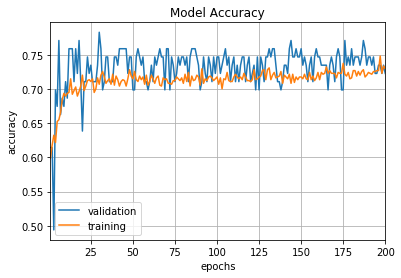

83/83 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5651423399706921, 0.7228915641106755]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 0.6612 - acc: 0.6019 - val_loss: 0.7247 - val_acc: 0.5422
Epoch 2/200
 - 0s - loss: 0.6531 - acc: 0.6072 - val_loss: 0.6799 - val_acc: 0.5422
Epoch 3/200
 - 0s - loss: 0.6480 - acc: 0.6218 - val_loss: 0.7191 - val_acc: 0.5422
Epoch 4/200
 - 0s - loss: 0.6447 - acc: 0.6178 - val_loss: 0.7563 - val_acc: 0.5422
Epoch 5/200
 - 0s - loss: 0.6353 - acc: 0.6538 - val_loss: 0.6934 - val_acc: 0.4940
Epoch 6/200
 - 0s - loss: 0.6212 - acc: 0.6658 - val_loss: 0.6478 - val_acc: 0.6988
Epoch 7/200
 - 0s - loss: 0.6125 - acc: 0.6791 - val_loss: 0.6631 - val_acc: 0.5904
Epoch 8/

Epoch 93/200
 - 0s - loss: 0.5702 - acc: 0.7204 - val_loss: 0.6303 - val_acc: 0.6747
Epoch 94/200
 - 0s - loss: 0.5666 - acc: 0.7297 - val_loss: 0.6797 - val_acc: 0.6867
Epoch 95/200
 - 0s - loss: 0.5653 - acc: 0.7310 - val_loss: 0.6521 - val_acc: 0.6867
Epoch 96/200
 - 0s - loss: 0.5656 - acc: 0.7230 - val_loss: 0.6352 - val_acc: 0.6867
Epoch 97/200
 - 0s - loss: 0.5675 - acc: 0.7177 - val_loss: 0.6424 - val_acc: 0.6988
Epoch 98/200
 - 0s - loss: 0.5691 - acc: 0.7097 - val_loss: 0.6351 - val_acc: 0.6867
Epoch 99/200
 - 0s - loss: 0.5665 - acc: 0.7297 - val_loss: 0.6369 - val_acc: 0.6867
Epoch 100/200
 - 0s - loss: 0.5676 - acc: 0.7204 - val_loss: 0.6280 - val_acc: 0.6747
Epoch 101/200
 - 0s - loss: 0.5670 - acc: 0.7150 - val_loss: 0.6442 - val_acc: 0.6988
Epoch 102/200
 - 0s - loss: 0.5676 - acc: 0.7137 - val_loss: 0.6311 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.5675 - acc: 0.7111 - val_loss: 0.6415 - val_acc: 0.6506
Epoch 104/200
 - 0s - loss: 0.5690 - acc: 0.7124 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5603 - acc: 0.7057 - val_loss: 0.6396 - val_acc: 0.6988
Epoch 190/200
 - 0s - loss: 0.5607 - acc: 0.7124 - val_loss: 0.6471 - val_acc: 0.6506
Epoch 191/200
 - 0s - loss: 0.5643 - acc: 0.7204 - val_loss: 0.6502 - val_acc: 0.6988
Epoch 192/200
 - 0s - loss: 0.5632 - acc: 0.7244 - val_loss: 0.6361 - val_acc: 0.6867
Epoch 193/200
 - 0s - loss: 0.5609 - acc: 0.7111 - val_loss: 0.6403 - val_acc: 0.6988
Epoch 194/200
 - 0s - loss: 0.5592 - acc: 0.7204 - val_loss: 0.6415 - val_acc: 0.6867
Epoch 195/200
 - 0s - loss: 0.5601 - acc: 0.7190 - val_loss: 0.6300 - val_acc: 0.6988
Epoch 196/200
 - 0s - loss: 0.5633 - acc: 0.7150 - val_loss: 0.6505 - val_acc: 0.6988
Epoch 197/200
 - 0s - loss: 0.5601 - acc: 0.7257 - val_loss: 0.6350 - val_acc: 0.6867
Epoch 198/200
 - 0s - loss: 0.5564 - acc: 0.7230 - val_loss: 0.6638 - val_acc: 0.6988
Epoch 199/200
 - 0s - loss: 0.5591 - acc: 0.7257 - val_loss: 0.6422 - val_acc: 0.6988
Epoch 200/200
 - 0s - loss: 0.5607 - acc: 0.7217 - val

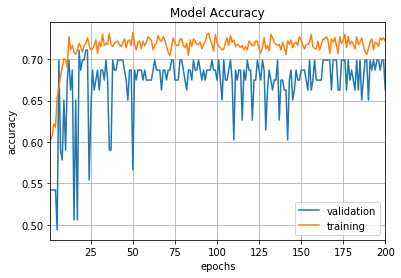

83/83 [==============================] - 0s 73us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6339063285345055, 0.6626506052821516]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------




In [13]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [14]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.7333333333333333
0.7141036841992109


[0.7293333327770233,
 0.7240000013510386,
 0.7333333333333333,
 0.7319999996821086,
 0.7256990663221133,
 0.7217043916014,
 0.7190412811528192,
 0.6045273006676675,
 0.7296937417174465,
 0.7217043933871583]

In [15]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.7469879532434854
0.6918818121796289


[[0.623175439380464, 0.6904761933145069],
 [0.5980845803306216, 0.7023809467043195],
 [0.645675608089992, 0.6785714285714286],
 [0.62464059534527, 0.6666666666666666],
 [0.5646314376808075, 0.7469879532434854],
 [0.5841152897800308, 0.7349397532911186],
 [0.5101537991719074, 0.7349397532911186],
 [0.682443050734968, 0.5783132573208177],
 [0.5651423399706921, 0.7228915641106755],
 [0.6339063285345055, 0.6626506052821516]]

In [16]:
kfold_validation_score_store

[[0.623175439380464, 0.6904761933145069],
 [0.5980845803306216, 0.7023809467043195],
 [0.645675608089992, 0.6785714285714286],
 [0.62464059534527, 0.6666666666666666],
 [0.5646314376808075, 0.7469879532434854],
 [0.5841152897800308, 0.7349397532911186],
 [0.5101537991719074, 0.7349397532911186],
 [0.682443050734968, 0.5783132573208177],
 [0.5651423399706921, 0.7228915641106755],
 [0.6339063285345055, 0.6626506052821516]]